In [15]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import DecisionBoundaryDisplay

In [5]:
df = pd.read_csv('data.csv')
print(df)

    Accuracy  Avg Reaction Time
0      100.0               1.49
1       99.0               2.80
2       68.4               2.31
3       83.6               2.63
4       88.7               1.93
5       82.5               1.74
6       61.3               1.27
7       58.3               2.15
8       65.7               1.48
9       76.3               1.82
10      97.3               1.79
11      93.0               1.73
12      98.2               2.65
13      84.3               2.13
14      77.6               1.34
15      84.5               1.45
16      89.4               1.56
17      91.2               1.30


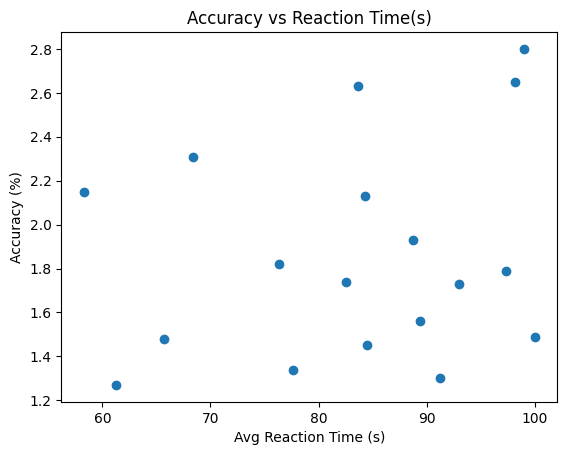

In [6]:
plt.scatter(df['Accuracy'], df['Avg Reaction Time'])
plt.xlabel('Avg Reaction Time (s)')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy vs Reaction Time(s)')
plt.show()

In [8]:
# Features and labels
X = df[["Accuracy", "Avg Reaction Time"]].values
y = df["Cluster"].values

In [9]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(df)

print(df)

    Accuracy  Avg Reaction Time  Cluster
0      100.0               1.49        1
1       99.0               2.80        1
2       68.4               2.31        0
3       83.6               2.63        2
4       88.7               1.93        1
5       82.5               1.74        2
6       61.3               1.27        0
7       58.3               2.15        0
8       65.7               1.48        0
9       76.3               1.82        2
10      97.3               1.79        1
11      93.0               1.73        1
12      98.2               2.65        1
13      84.3               2.13        2
14      77.6               1.34        2
15      84.5               1.45        2
16      89.4               1.56        1
17      91.2               1.30        1


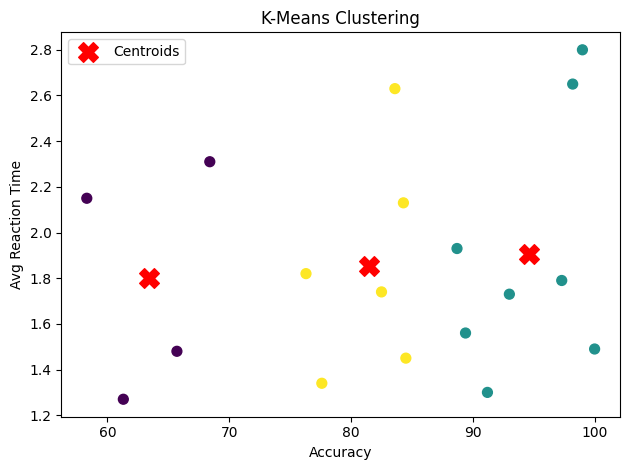

In [11]:
plt.scatter(df["Accuracy"], df["Avg Reaction Time"], c=df["Cluster"], cmap="viridis", s=50)

# Plot cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c="red", s=200, marker="X", label="Centroids")

plt.xlabel("Accuracy")
plt.ylabel("Avg Reaction Time")
plt.title("K-Means Clustering")
plt.legend()
plt.tight_layout()
plt.show()

In [12]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
svm = SVC(kernel="linear", random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

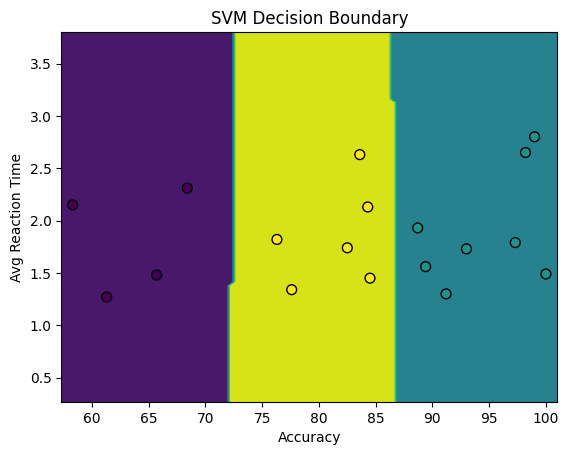

In [20]:
disp = DecisionBoundaryDisplay.from_estimator(
    svm,
    X,                
    response_method="predict",
    xlabel="Accuracy",
    ylabel="Avg Reaction Time",
    cmap="viridis"
)

# Overlay all points
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k", s=50)
plt.title("SVM Decision Boundary")
plt.show()

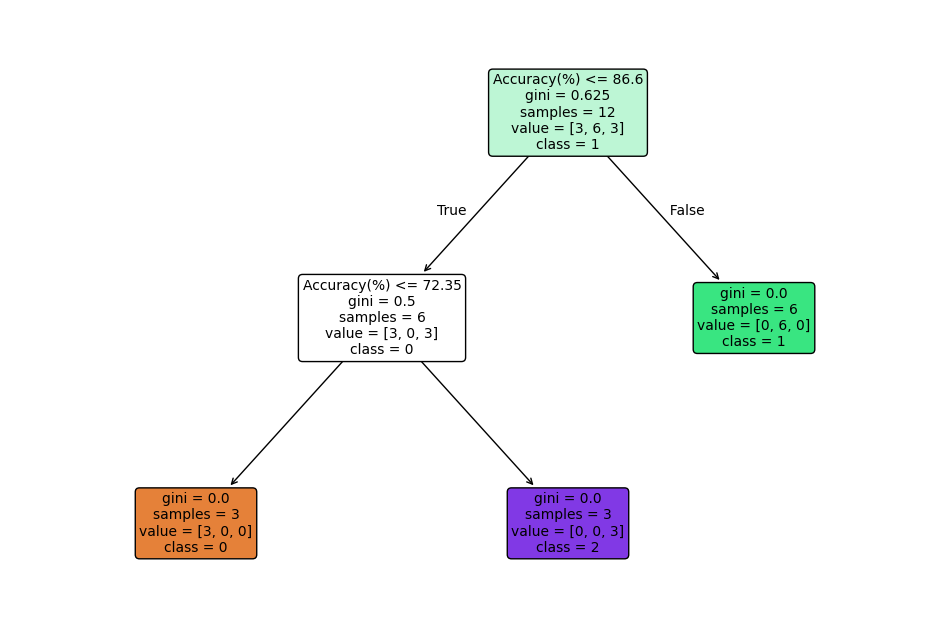

In [19]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
plt.figure(figsize=(12,8))
plot_tree(dt, feature_names=["Accuracy(%)", "Avg. Reaction Time(s)"],
          class_names=[str(c) for c in np.unique(y)],
          filled=True, rounded=True, fontsize=10)
plt.show()

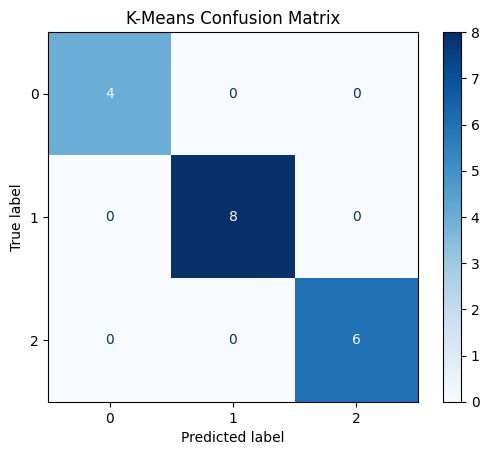

In [21]:
y_pred_kmeans = df["Cluster"].values

cm_kmeans = confusion_matrix(y, y_pred_kmeans)
disp = ConfusionMatrixDisplay(cm_kmeans)
disp.plot(cmap=plt.cm.Blues)
plt.title("K-Means Confusion Matrix")
plt.show()

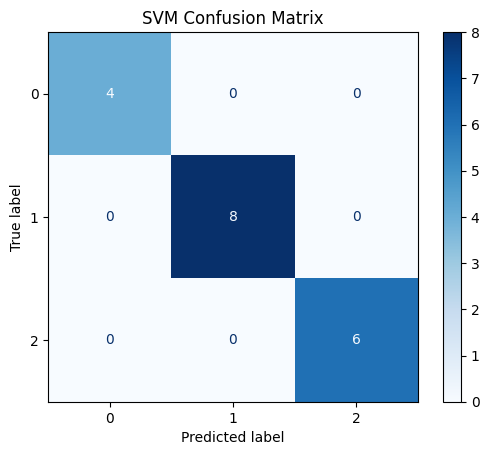

In [22]:
y_pred_svm = svm.predict(X)

cm_svm = confusion_matrix(y, y_pred_svm)
disp = ConfusionMatrixDisplay(cm_svm)
disp.plot(cmap=plt.cm.Blues)
plt.title("SVM Confusion Matrix")
plt.show()

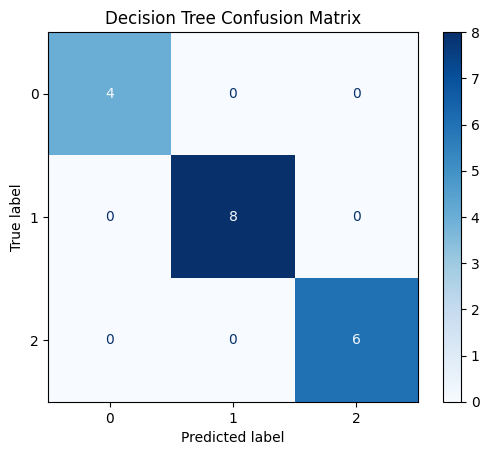

In [23]:
# Decision Tree predictions
y_pred_dt = dt.predict(X)

cm_dt = confusion_matrix(y, y_pred_dt)
disp = ConfusionMatrixDisplay(cm_dt)
disp.plot(cmap=plt.cm.Blues)
plt.title("Decision Tree Confusion Matrix")
plt.show()